In [1]:
import yt
import yt_idv

In [2]:
ds = yt.load_sample("IsolatedGalaxy")
dd = ds.all_data()

yt : [INFO     ] 2022-03-07 11:59:08,565 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-03-07 11:59:08,627 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-03-07 11:59:08,628 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-03-07 11:59:08,629 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-07 11:59:08,629 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-07 11:59:08,630 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 22840.33it/s]
yt : [INFO     ] 2022-03-07 11:59:08,646 Gathering a field list (this may take a moment.)


In [3]:
# rc = yt_idv.render_context("osmesa", width = 400, height = 400)
# rc.add_scene(dd, "density", no_ghost=True)
# rc.run()
# rc.add_image()

In [4]:
# rc = yt_idv.render_context("osmesa", width = 400, height = 400)
# sg = rc.add_scene(ds, None, no_ghost=True)

# odata = yt_idv.scene_data.block_collection.BlockCollection(data_source=dd)
# odata.add_data("density")
# oren = yt_idv.scene_components.blocks.BlockRendering(data=odata)

# sg.data_objects.append(odata)
# sg.components.append(oren)

# rc.run()
# rc.add_image()

In [17]:
rc = yt_idv.render_context("osmesa", width = 400, height = 400)
sg = rc.add_scene(ds, None, no_ghost=True)


In [18]:
odata = yt_idv.scene_data.block_collection.BlockCollection(data_source=dd)
odata.add_data("density")
oren = yt_idv.scene_components.blocks.BlockRendering(data=odata)

In [19]:
oren.render_method

'max_intensity'

In [20]:
oren.render_method = "transfer_function"

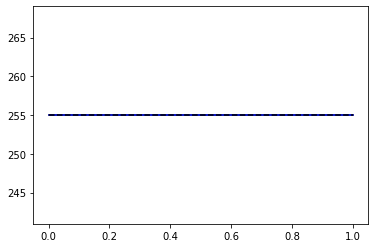

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
def plot_tf(oren, ax):
    R = oren.transfer_function.data[:,0,0]
    G = oren.transfer_function.data[:,0,1]
    B = oren.transfer_function.data[:,0,2]
    a = oren.transfer_function.data[:,0,3]
    x = np.linspace(0, 1, 256)    
    ax.plot(x, R, 'r')
    ax.plot(x, G, 'g')
    ax.plot(x, B, 'b')
    ax.plot(x, a, '--k')
    
f, ax = plt.subplots(1)
plot_tf(oren, ax)


In [22]:
new_tf = np.ones(oren.transfer_function.data.shape)
x = np.linspace(0, 1, 256)

new_tf[:,0, 0] = 255 * np.exp(-((x - 0.8)/0.02)**2)
new_tf[:,0, 1] = 255 * np.exp(-((x - 0.6)/0.02)**2)
new_tf[:,0, 2] = 255 * np.exp(-((x - 0.4)/0.02)**2)
new_tf[:,0, 3] = 255 * np.ones(x.shape)
new_tf = new_tf.astype("u1")
oren.transfer_function.data = new_tf


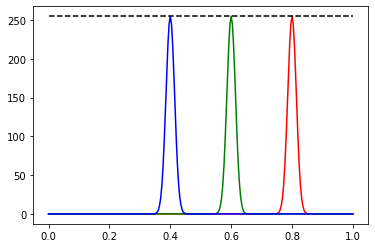

In [23]:
f, ax = plt.subplots(1)
plot_tf(oren, ax)

In [24]:
sg.data_objects.append(odata)
sg.components.append(oren)

rc.run()
rc.add_image()

Computed new cmap values 0.0 - 0.0


/home/chavlin/src/yt_general/yt/yt/visualization/image_writer.py:152: RuntimeWarning: invalid value encountered in true_divide
  bitmap_array = np.clip(bitmap_array[:, :, :3] / max_val, 0.0, 1.0) * 255


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x06\x00\x00\x00\x80\xbf6…

In [25]:
import numpy as np 


In [35]:
rc = yt_idv.render_context("osmesa", width = 400, height = 400)
sg = rc.add_scene(ds, None, no_ghost=True)

odata = yt_idv.scene_data.block_collection.BlockCollection(data_source=dd)
odata.add_data("density")
oren = yt_idv.scene_components.blocks.BlockRendering(data=odata)

# set render method to use tf
oren.render_method = "transfer_function"
oren.tf_log = False
oren.tf_min = 0.
oren.tf_max = 1. 

# set the value of the tf function
new_tf = np.zeros(oren.transfer_function.data.shape)
x = np.linspace(0, 1, 256)
new_tf[:,0, 0] = np.exp(-((x - 0.8)/0.1)**2)
# new_tf[:,0, 0] = np.exp(-((x - 0.1)/0.1)**2)
# new_tf[:,0, 1] = np.exp(-((x - 0.6)/0.02)**2)
# new_tf[:,0, 2] = np.exp(-((x - 0.4)/0.02)**2)
new_tf[:,0, 3] = np.ones(x.shape)

# assign the function
oren.transfer_function.data = (255 * new_tf).astype("u1")

sg.data_objects.append(odata)
sg.components.append(oren)

rc.run()
rc.add_image()

Computed new cmap values 0.0 - 0.0


/home/chavlin/src/yt_general/yt/yt/visualization/image_writer.py:152: RuntimeWarning: invalid value encountered in true_divide
  bitmap_array = np.clip(bitmap_array[:, :, :3] / max_val, 0.0, 1.0) * 255


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x06\x00\x00\x00\x80\xbf6…